In [5]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from utils import df_from_txts, add_year_column, get_TopicDict_counts, unique_path

### CONFIGURATION

# Paths
from conf import CLEAN_TXT_DIR, METADATA_CSV, CACHE_DIR

# Topics definition
# You should first apply LSA to the data-set in order to get an idea
# of the main topics and keywords that define the data-set.
# In this example, we have chosen some fields of interest, and chosen
# the keywords that should best correlate to them, based on the LSA output.
topics = {}
topics["Medicine"] = ["medical", "patient", "health", "treatment"]
topics["ML"] = ["neural", "train", "recognition", "learn"]
topics["Aut. driving"] = ["vehicle", "autonomous", "park"]
topics["Quantum comput."] = ["quantum"]

# Years range
years = range(2000, 2020)


### EXECUTION
csv_data = CACHE_DIR / Path('dataset.csv')
if csv_data.exists():
    df = pd.read_csv(csv_data, index_col="ID")
else:
    df = df_from_txts(CLEAN_TXT_DIR)
    df.to_csv(csv_data)

df = add_year_column(df, METADATA_CSV)


In [3]:
# Compute topic_year_counts matrix:
N_TOPICS = len(topics.keys())
N_YEARS = len(years)
topic_year_counts = np.zeros((N_TOPICS, N_YEARS))

for i, year in enumerate(years):
    # for every year, compute topic_count_array
    target_docs = df[df["Year"] == str(year)]
    target_txts = target_docs["Text"]
    topics_count = get_TopicDict_counts(target_txts, topics, max_count=3)
    topic_year_counts[:,i] = np.array(topics_count)


Medicine
 - Keywords: ['medical', 'patient', 'health', 'treatment']
ML
 - Keywords: ['neural', 'train', 'recognition', 'learn']
Aut. driving
 - Keywords: ['vehicle', 'autonomous', 'park']
Quantum comput.
 - Keywords: ['quantum']


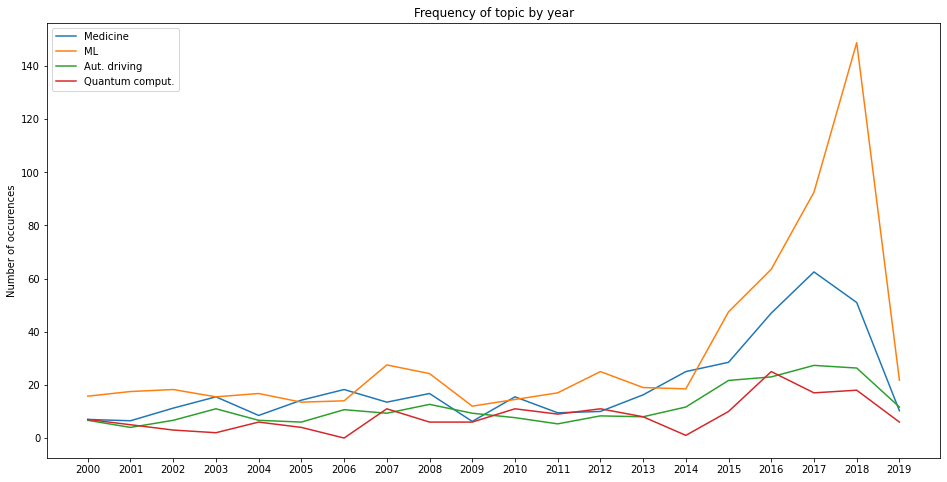

In [4]:
### PLOTTING

# print topics
for t in topics:
    print(f"{t}")
    print(f" - Keywords: {topics[t]}")

# plot
fig, ax = plt.subplots(figsize=(16, 8))

for i, t in enumerate(topics):
    ax.plot(range(N_YEARS), topic_year_counts[i, :], label=t)

ax.legend()
ax.set_xticks(range(len(years)))
ax.set_xticklabels(years)
ax.set_ylabel("Number of occurences")
ax.set_title("Frequency of topic by year")
plt.show()